# Explore The Movie DB 
-----------------------------------------

## Getting Started
-----------------------------------------
This data set from [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata/data), The dataset contains this rows 

- id:Numeric
- budget:Numeric
- genres:separated by | ,String
- homepage:web link ,String
- original_title:String
- overview:String
- popularity:Numeric
- production_companies: separated by | ,String
- release_date: the format is mm/dd/yy,DateTime
- revenue:Numeric
- runtime:Numeric
- tagline:String
- vote_average:Numeric
- vote_count:Numeric


## Exploring the Data
---------------------------

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
numOfRows, numOfColumns = df.shape
print("The number of rows is", numOfRows)

The number of rows is 10866


### Preparing the Data
As we can see production companies, genres, and cast contains one string with | as separation, we'll enhance this by convert it to list of strings 

In [6]:
def converSeparatorToList(row,Separator = "|"):
    #if you run this cell twice you'll make your columns null because there is no separator in you columns
    # so we'll check if the data is already prepaed we'll skip this step 
    if not isinstance(df[row][0], list):
        df[row] = df[row].str.split(Separator)
        
converSeparatorToList("genres")
converSeparatorToList("production_companies")
converSeparatorToList("cast")
converSeparatorToList("director")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,[Colin Trevorrow],The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,[George Miller],What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,[Robert Schwentke],One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,[J.J. Abrams],Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,[James Wan],Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## What we looking for?
let's start with what we want to find from this data set, We'll answer these questions 

1 - Is there a correlation between movie time and popularity or vote average?, So we'll see if the movie is long does this affect the popularity and vote average, and if there is an effect it's positive or negative effect

2 - Who are the most 5 production companies particpate in movies making, Who are the most five production companies has popularity.

3 - Who are the most five directors has the high vote average.

4 - Is the movie title with one word normaly has a high popularity

#### 1- Is there a correlation between movie time and popularity or vote average?


In [141]:
import matplotlib.pyplot as plt
def showScatter(x,y,title,x_label,y_label):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.title(title)
    plt.scatter(np.array(df[x_label]).flatten(), np.array(df[y_label]).flatten(), s=100, color="blue", alpha=0.2)

def showDots(dataframe, title,x,y):
    plt.scatter(dataframe[x], dataframe[y],  s=100, color="blue", alpha=0.5)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.title(title)
    plt.show()

def showHBar(dataframe, title, x, y):
    plt.barh(dataframe[x],dataframe[y])
    plt.title(title)
    plt.show()

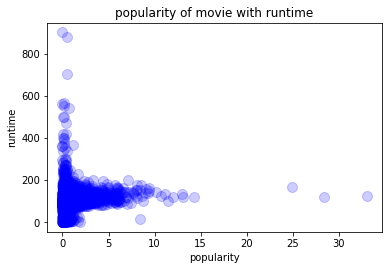

In [10]:
showScatter('popularity','runtime',"popularity of movie with runtime",'popularity','runtime')

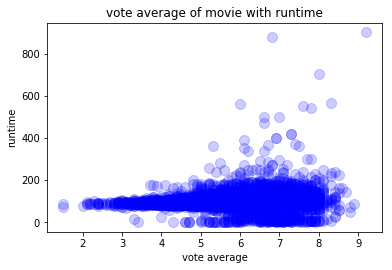

In [11]:
showScatter('vote average','runtime',"vote average of movie with runtime",'vote_average','runtime')

From above chart we can find that the long runtime of a movie lead to less popularity, on other hand long runtime lead to high vote average, from this points I'm wondering is less popularity lead to high vote average? 

let's figure out

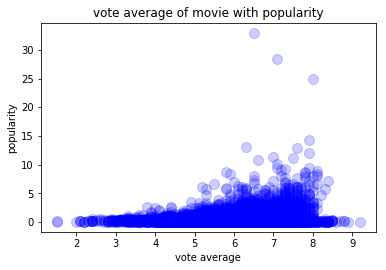

In [12]:
showScatter('vote average','popularity',"vote average of movie with popularity",'vote_average','popularity')

We can see there are a lot of movies has low popularity with low vote average, So popularity does not lead to high vote average

#### 2- Who are the most 5 production companies participate in movies making, Who are the most five production companies has popularity?
Ok let's start with Who are the most 5 production companies participate in movies making? 
we'll make a map to store production company with number of films they participate in

lets write functions that I need to prepare my data  

In [127]:
from collections import Counter, OrderedDict
from operator import itemgetter

def convertDataToList(column):
    #convert column to flat list 
    flat_list = []
    column_as_list = df[column].tolist()
    for sublist in column_as_list:
        if(type(sublist) == list):
            for item in sublist:
                flat_list.append(item)                
    return flat_list

def getSortedRepetitionNumber(listData,ascending=False):
    #return columns conatin lists as one list, all item DES by default  
    list_as_df = pd.DataFrame({'data_list':listData})
    list_as_df = list_as_df['data_list'].value_counts(ascending=ascending).to_frame(name="freq")
    list_as_df = list_as_df.reset_index()
    return list_as_df

def converListOfColToFlat(col_of_list,col_of_value):
    #return how much key has value in total
    local_df = pd.DataFrame()
    
    for row in df.iterrows():
        if type(row[1][col_of_list]) == list:
            listData = row[1][col_of_list]
            for item in listData:
                row_df = pd.DataFrame([[item, row[1][col_of_value]]], columns=list([col_of_list,col_of_value]))
                local_df = local_df.append(row_df)
    local_df = local_df.reset_index()
    return local_df
    
def getSumOfColumnValues(dataframe, col_name, col_value, ascending=False):
    #return how much key has value in total
    sum_df = dataframe.groupby(col_name, as_index=False)[[col_value]].sum()
    return sum_df.sort_values(by=[col_value],ascending=ascending)

def getAvarageOfSumOfColumnValues(dataframe, col_name, col_value, ascending=False):
    #return how much key has value in total
    avg_df = dataframe.groupby([col_name, col_value]).sum().reset_index().groupby(col_name).mean().reset_index()
    return avg_df.sort_values(by=[col_value],ascending=ascending)


def getTopNItem(selected_df, limit=-1):
    #return all item by default 
    return selected_df.iloc[:limit,:]

We have 7879 companies, and we want to know what are the most production companies participate in movies making


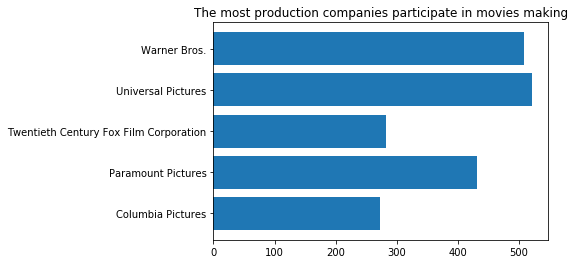

In [149]:
production_companies_list = getSortedRepetitionNumber(convertDataToList("production_companies"))
most_participate = getTopNItem(production_companies_list, 5)
print("We have "+str(production_companies_list['index'].count())+" companies, and we want to know what are the most production companies participate in movies making")
showHBar(most_participate,"The most production companies participate in movies making",'index','freq')

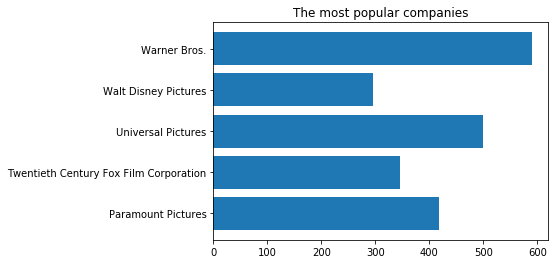

In [105]:
#PopularityDictData = getTopNItem(getSumOfColumnValues("production_companies","popularity"), 5)
Popular_companies = getTopNItem(
    getSumOfColumnValues(
        converListOfColToFlat("production_companies","popularity"),"production_companies","popularity"),5)
showHBar(Popular_companies,"The most popular companies","production_companies","popularity")


We found out the most companies have exprince and most companies have popularity, I think this is help a lot if you are looking for one. 

---------------
#### 3- Who are the most five directors has the high vote average?

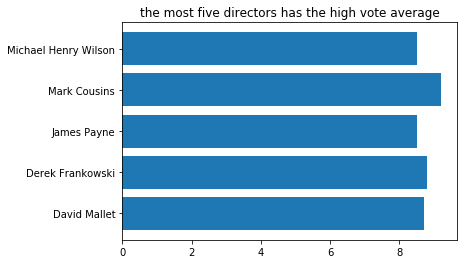

In [128]:
most_directors_has_high_vote_average = getTopNItem(
    getAvarageOfSumOfColumnValues(
        converListOfColToFlat("director","vote_average"),"director","vote_average"),5)
showHBar(most_directors_has_high_vote_average,"the most five directors has the high vote average","director","vote_average")

We also found the directors have the highest average vote 

---
#### 4- Is the movie title with one word normaly has a high popularity

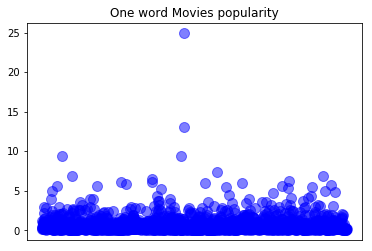

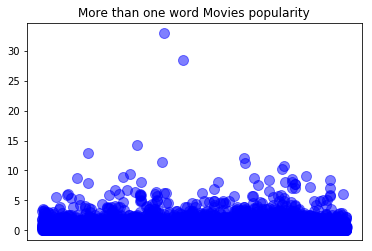

In [144]:
def getpopularityOfTitle():
    #return how much title has popularity
    local_df = df[df['original_title'].notna()]
    one_word_df = local_df[~local_df["original_title"].str.contains(" ")]
    more_than_one_word_df = local_df[local_df["original_title"].str.contains(" ")]

    return one_word_df, more_than_one_word_df

one_word_df, more_than_one_word_df = getpopularityOfTitle()
showDots(one_word_df,"One word Movies popularity",'original_title','popularity')
showDots(more_than_one_word_df,"More than one word Movies popularity",'original_title','popularity')

From above two charts we can say there is no effect to the popularity if the movie has name with one word or not

### conclusion
This is the last part of our data investigation, we came with answers to all of our questions

Q1 - Is there a correlation between movie time and popularity or vote average?, So we'll see if the movie is long does this affect the popularity and vote average, and if there is an effect it's positive or negative effect?

Yes, long runtime of a movie may lead to negative effect which is less popularity, on other hand long runtime may lead to positive effect which is high vote average

Q2 - Who are the most 5 production companies particpate in movies making, Who are the most five production companies has popularity.

The most 5 production companies particpate in movies making:

1- Universal Pictures

2- Warner Bros

3- Paramount Pictures

4- Twentieth Century Fox Film Corporation

5- Columbia Pictures


The most five production companies has popularity:

1- Warner Bros

2- Universal Pictures

3- Paramount Pictures

4- Twentieth Century Fox Film Corporation

5- Walt Disney Pictures


Q3 - Who are the most five directors has the high vote average

1- Mark Cousins

2- Derek Frankowski

3- David Mallet

4- Curt Morgan

5- James Payne


Q4 - Is the movie title with one word normaly has a high popularity

No, It seems there is no correlation between popularity and the movie with one word or not